In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

from env import host, user, password

import wrangle as w

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score 
from math import sqrt

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans

Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [2]:
w.wrangle_zillow()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,...,1.076313,0.103444,0.1,0.7,156.681613,0.5,119.300710,0.5,0.875000,0
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,...,1.222517,0.290335,0.3,0.3,60.068259,0.2,29.730371,0.3,0.500000,0
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,...,1.148823,0.193572,0.2,0.2,68.615447,0.2,56.865394,0.4,0.666667,0
3,12177905,-0.103410,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,...,1.224661,0.299311,0.3,0.5,45.840909,0.1,2.778417,0.1,0.750000,0
4,12095076,-0.001011,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,...,1.230599,1.446281,0.5,0.6,93.411209,0.3,7.882841,0.2,0.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50672,11000655,0.020615,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,12447.0,...,1.262878,1.088269,0.5,0.3,55.145412,0.2,5.984685,0.2,1.000000,1
50673,17239384,0.013209,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,...,1.647913,0.277893,0.3,0.4,31.441067,0.1,1.364891,0.1,0.500000,0
50674,12773139,0.037129,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,...,1.768922,0.116483,0.1,0.2,31.780039,0.1,3.300946,0.1,0.333333,0
50675,12826780,0.007204,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,...,1.210182,0.145707,0.1,0.4,79.455165,0.3,60.185915,0.4,0.666667,0


In [3]:
df=w.wrangle_zillow()

In [4]:
train, validate, test = w.split_data(df)

In [5]:
train.head()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,1.435365,0.126079,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,1.756942,0.152066,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,1.118434,0.114027,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,1.110092,0.169858,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,1.282477,0.134780,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0


In [6]:
train_scaled, validate_scaled, test_scaled=w.scale_data(train, validate, test)

In [7]:
train_scaled.head()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
40409,14357041,0.414580,0.416667,0.333333,0.275165,6059.0,0.245398,0.923479,0.006859,52650.0,...,1.435365,0.006859,0.1,0.6,0.116026,0.5,0.063539,0.5,0.345238,0
23172,11185767,0.422406,0.500000,0.500000,0.269389,6037.0,0.863565,0.673858,0.008336,40227.0,...,1.756942,0.008336,0.2,0.6,0.025899,0.1,0.005032,0.2,0.285714,0
49707,11471750,0.419310,0.333333,0.500000,0.195132,6037.0,0.397145,0.552532,0.006174,55753.0,...,1.118434,0.006174,0.1,0.5,0.117293,0.5,0.084231,0.5,0.196429,0
36587,14234304,0.406003,0.333333,0.500000,0.151609,6059.0,0.308994,0.865966,0.009347,33252.0,...,1.110092,0.009347,0.2,0.4,0.044535,0.2,0.024892,0.3,0.196429,0
6405,12992951,0.433831,0.166667,0.333333,0.092616,6037.0,0.481090,0.782651,0.007353,118895.0,...,1.282477,0.007353,0.1,0.2,0.061962,0.3,0.025591,0.3,0.166667,0


Assuming normal distribution, use Pearsonsr correlation.

In [8]:
pearson_corr= train_scaled.corr(method='pearson')
pearson_corr

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,1.000000,0.012369,0.086920,0.108231,0.091019,0.710135,-0.239917,-0.074156,-0.025973,-0.022828,...,-0.155579,-0.025973,-0.057260,0.103678,0.024081,0.052502,0.044431,0.093747,0.028367,-0.364576
logerror,0.012369,1.000000,0.028778,0.028785,0.032193,0.007235,-0.016768,0.028789,0.003579,0.010212,...,0.012930,0.003579,0.007225,0.025029,-0.038802,-0.036686,-0.013311,-0.025110,0.009372,-0.027550
bathrooms,0.086920,0.028778,1.000000,0.641902,0.847796,0.125028,-0.033856,0.012193,0.127202,-0.053728,...,-0.166565,0.127202,0.319262,0.821433,0.344681,0.374689,0.181762,0.175651,0.685867,-0.045270
bedrooms,0.108231,0.028785,0.641902,1.000000,0.631444,0.148381,0.005074,0.005207,0.063415,-0.045229,...,-0.085349,0.063415,0.273749,0.667828,0.126255,0.155158,0.005939,0.011904,-0.058406,-0.108588
sq_feet,0.091019,0.032193,0.847796,0.631444,1.000000,0.130696,-0.063703,0.012214,0.185366,-0.046682,...,-0.174575,0.185366,0.423073,0.918266,0.330055,0.352643,0.153775,0.156888,0.483628,-0.031711
fips,0.710135,0.007235,0.125028,0.148381,0.130696,1.000000,-0.068768,-0.370492,0.000492,-0.040569,...,-0.215268,0.000492,-0.001761,0.152277,0.065550,0.108743,0.028560,0.068521,0.047457,-0.309887
latitude,-0.239917,-0.016768,-0.033856,0.005074,-0.063703,-0.068768,1.000000,-0.542903,0.132145,-0.020472,...,0.259021,0.132145,0.300307,-0.047351,0.015413,0.044957,-0.272339,-0.388817,-0.048245,0.197616
longitude,-0.074156,0.028789,0.012193,0.005207,0.012214,-0.370492,-0.542903,1.000000,-0.060610,0.006811,...,0.025694,-0.060610,-0.121544,0.015970,-0.120054,-0.122520,0.063230,0.078508,0.018354,-0.333685
lotsizesquarefeet,-0.025973,0.003579,0.127202,0.063415,0.185366,0.000492,0.132145,-0.060610,1.000000,-0.023546,...,-0.024003,1.000000,0.513922,0.143182,0.065380,0.073979,-0.099511,-0.199405,0.096095,0.005764
regionidcity,-0.022828,0.010212,-0.053728,-0.045229,-0.046682,-0.040569,-0.020472,0.006811,-0.023546,1.000000,...,-0.007245,-0.023546,-0.037075,-0.055689,-0.024655,-0.023447,-0.002662,0.019192,-0.034425,-0.229132


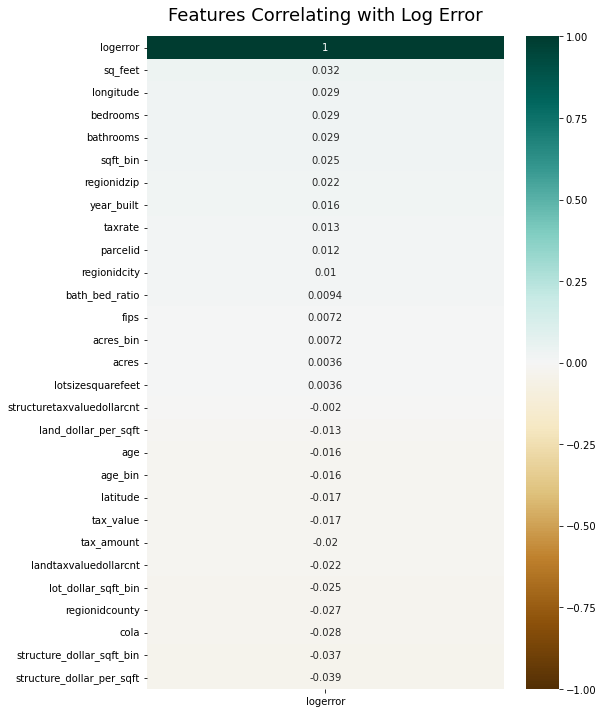

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['logerror']].sort_values(by='logerror', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Log Error', fontdict={'fontsize':18}, pad=16);

In [24]:
target_var= 'logerror'

In [25]:
# Use a scipy stats function pearson to calculate the correlation coefficient and the p-value.
def pearson_test(train_scaled, target_var, test_var):
    r, p_value = pearsonr(train_scaled[target_var], train_scaled[test_var])
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

In [26]:
pearson_test(train_scaled, target_var, 'bath_bed_ratio')

Correlation Coefficient: 0.009372484429086099
P-value: 0.11437450754268848


In [27]:
pearson_test(train_scaled, target_var, 'sq_feet')

Correlation Coefficient: 0.032193135236142506
P-value: 5.816619449748015e-08


In [28]:
pearson_test(train, target_var, 'bath_bed_ratio')

Correlation Coefficient: 0.009372484429086106
P-value: 0.11437450754268848


In [29]:
pearson_test(train, target_var, 'sq_feet')

Correlation Coefficient: 0.032193135236142506
P-value: 5.816619449748015e-08


In [30]:
corr, p = stats.pearsonr(train.sq_feet, train.logerror)
corr, p

(0.032193135236142506, 5.816619449748015e-08)

In [ ]:
sns.scatterplot(x='bathrooms', y='logerror', hue='fips', data=train_scaled)
